# Neural Network Regression with Tensorflow

2023-11-07 23:03:03.994818: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.framework.ops.EagerTensor)

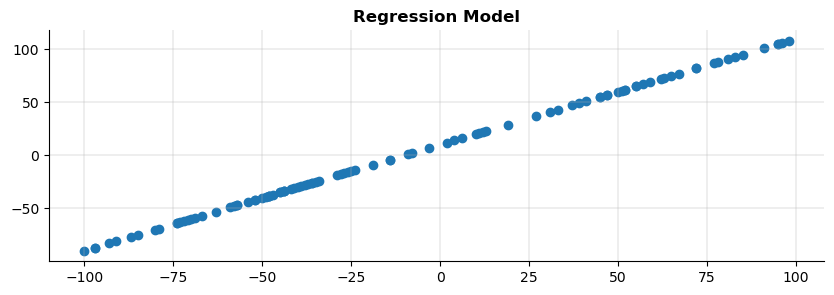

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

x = np.random.randint(-100, 100, 100)
y = x + 10

plt.figure(figsize=(10,3))
plt.scatter(x, y)
plt.grid(lw = 0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Regression Model', fontweight = 'bold', y = 1);

# numpy to tensors
X = tf.constant(x)
Y = tf.constant(y)
type(X), type(Y)

## Step in modelling with Tensorflow

 1) **Creating a Model** - Define the input, the output layers & the hidden layers of our deep learning model
 2) **Compiling the model** - Define the loss function (how our model function is wrong) & the optimizer (tell to our model how to improve) & Evaluation metrics (what we can use to interpret the performance of our model). 
 3) **Fitting a model** - letting the model try to find pattern between X & Y (features and labels)
 
 
 * **!)** Nous ne pouvons pas entrer dans le model des données d'une dimension. Pour cela il est important de les redimmensioner avant en utilisant `tf.reshape(X, shape = (,1))`.  

In [11]:
X = tf.reshape(X, shape=(100,1)) # (10,) -> (10, 1)
Y = tf.reshape(Y, shape=(100,1))

# Split the Data

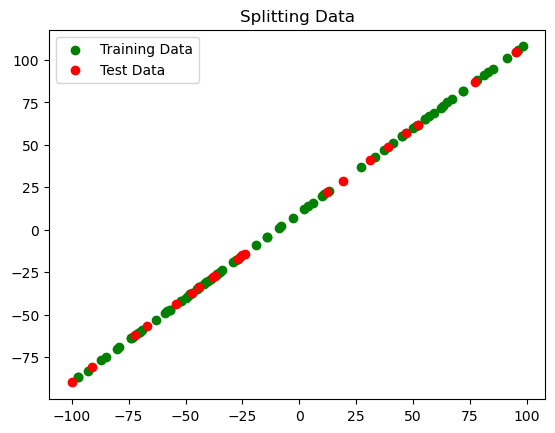

In [12]:
# splitting data in 80/20
X_train = X[:80]
Y_train = Y[:80]

X_test  = X[80:]
Y_test = Y[80:]

plt.title('Splitting Data')
plt.scatter(X_train, Y_train, c = 'green', label = 'Training Data')
plt.scatter(X_test, Y_test, c = 'red', label = 'Test Data')
plt.legend();

In [13]:
# create the model
model = tf.keras.Sequential([                     # `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
    tf.keras.layers.Dense(1, activation='relu')
])

# compile the model
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics = 'mae')

# fit the model
model.fit(X_train, Y_train, epochs=10)  # epoch = how many time the model will go throught all the training examples

Epoch 1/10
3/3 [==============================] - 1s 4ms/step - loss: 29.3242 - mae: 29.3242
Epoch 2/10
3/3 [==============================] - 0s 12ms/step - loss: 26.6035 - mae: 26.6035
Epoch 3/10
3/3 [==============================] - 0s 16ms/step - loss: 25.8375 - mae: 25.8375
Epoch 4/10
3/3 [==============================] - 0s 14ms/step - loss: 25.8592 - mae: 25.8592
Epoch 5/10
3/3 [==============================] - 0s 7ms/step - loss: 26.8291 - mae: 26.8291
Epoch 6/10
3/3 [==============================] - 0s 10ms/step - loss: 25.8623 - mae: 25.8623
Epoch 7/10
3/3 [==============================] - 0s 8ms/step - loss: 26.2353 - mae: 26.2353
Epoch 8/10
3/3 [==============================] - 0s 10ms/step - loss: 25.0944 - mae: 25.0944
Epoch 9/10
3/3 [==============================] - 0s 12ms/step - loss: 25.6852 - mae: 25.6852
Epoch 10/10
3/3 [==============================] - 0s 11ms/step - loss: 26.0285 - mae: 26.0285


## Make a first prediction

In [16]:
y_pred = model.predict(Y_test[8])   # -> bonne reponse x + 10
y_pred

1/1 [==============================] - 0s 45ms/step


array([[0.]], dtype=float32)

# Improving our model

1) **Improve it in the creation of the model :** Add more layers & increases the numbers of neurons, change the activation function of each layer. 
2) **Improve in the step of the compilling :** Change the optimization function or the **learning rate** of the optimization function
3) **In the step of the fitting :** Increase the numbers of epochs (training longer but very usefull) or more data.

## The differents activation functions

* ReLU (Rectified Linear Unit) : La fonction d'activation la plus couramment utilisée dans les couches cachées des réseaux de neurones profonds.
* Sigmoid : Principalement dans les couches de sortie des tâches de classification binaire, car elle renvoie des valeurs entre 0 et 1. 
* Tanh (Hyperbolic Tangent) : Alternative à la fonction sigmoid, nous pouvons l'utiliser dans les couches cachées des réseaux de neurones feed-forward.
* Softmax : Dans la couche de sortie des tâches de classification multi-classes. Elle retourne une distribution de probabilités sur les classes.

## The differents optimizers functions

* SGD (Stochastic Gradient Descent) :  C'est la version stochastique de la descente de gradient, où la mise à jour des poids est effectuée sur un sous-ensemble (batch) des données plutôt que sur l'ensemble complet. 
    * Inconvenients : Sensible au choix du taux d'apprentissage et peut osciller autour du minimum.
    * Utilisation : Lorsqu'il y a beaucoup de données et que la vitesse d'entraînement est essentielle ou Lorsque nous voulons un optimiseur simple sans hyperparamètres supplémentaires (hormis le taux d'apprentissage).
* Adam (Adaptive Moment Estimation) :  C'est un optimiseur adaptatif qui ajuste le taux d'apprentissage pour chaque paramètre en utilisant des estimations du premier et du second moment des gradients.
    * Avantages : Converge généralement plus rapidement que SGD et moins sensible au choix initial du taux d'apprentissage.
    * Inconvenients : Introduit plusieurs hyperparamètres supplémentaires
    * Utilisation : Lorsque nous travaillons avec des architectures de réseau profond ou complexes.
    
## The Learning Rate :
Le taux d'apprentissage (ou "learning rate") est un hyperparamètre crucial dans l'entraînement des réseaux de neurones. C'est un facteur qui détermine à quel point les poids du modèle sont ajustés par rapport au gradient de la fonction de perte lors de chaque mise à jour.

* Si le taux d'apprentissage est trop élevé, l'entraînement peut osciller et ne jamais converger vers une solution.
* Si le taux d'apprentissage est trop faible, l'entraînement peut converger très lentement.

**Comment trouver le Learning Rate optimal ? :** 

1) Utiliser le LearningRateScheduler avec le modèle :

            `from tensorflow.keras.callbacks import LearningRateScheduler`

            `scheduler = LearningRateScheduler(lr_schedule)` -> Créer le scheduler

            `model.fit(X_train, y_train, epochs=30, callbacks=[scheduler])` -> Utiliser le scheduler lors de l'entraînement

    Le taux d'apprentissage optimal est souvent situé juste avant que la perte ne commence à augmenter, ou là où la perte diminue le plus rapidement.
    
2) Méthode empirique : Commencez par une valeur comme 0.01. Si l'entraînement oscille ou diverge, essayez une valeur plus faible. Si l'entraînement est très lent, essayez une valeur plus élevée.

## To Know before improving Model :

* **Adding layers :** 
    * Complexité accrue: L'ajout d'une couche supplémentaire augmente la complexité du modèle. Si vos données ne sont pas très complexes ou si vous n'avez pas suffisamment de données, un modèle plus complexe peut sur-entraîner (overfit) sur vos données d'entraînement, ce qui peut entraîner une mauvaise généralisation et une augmentation de l'erreur sur l'ensemble d'entraînement lui-même.
    * L'ajout d'une couche supplémentaire peut nécessiter l'ajustement du taux d'apprentissage pour les optimiseurs SGD ou Adam qui est avec son taux d'apprentissage par défaut. Un taux d'apprentissage qui fonctionne bien pour un modèle simple peut ne pas être optimal pour un modèle plus complexe.
    
    
* **Adding neurons :** 

    * Un plus grand nombre de neurones augmente la capacité du modèle à apprendre des motifs plus complexes dans les données.
    * Cependant, un modèle avec trop de neurones risque de sur-entraîner (overfitting), c'est-à-dire qu'il mémorise les données d'entraînement au lieu d'apprendre les motifs sous-jacents. Cela peut conduire à de mauvaises performances sur les données non vues.
    * Augmenter le nombre de neurones augmentera également la complexité computationnelle du modèle, nécessitant plus de temps pour l'entraînement 

* **Tuning weight :** 

    L'initialisation des poids est cruciale pour le comportement et la performance des réseaux de neurones. Une bonne initialisation facilite la convergence rapide lors de l'entraînement. 

    * pour les fonctions d'activation ReLU et ses variantes -> `kernel_initializer = he_uniform\he_normal`
    * pour les fonctions d'activation Sigmoid et Hyperbolic Tangent (tanh -> `kernel_initializer=glorot_normal \ glorot_uniform`

In [17]:
# create the model
model = tf.keras.Sequential([        # `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),   # The learning_rate change a lot !!
              metrics = 'mae')

# fit the model
model.fit(X_train, Y_train, epochs=100, verbose=0)  # I just increased the number of epochs it's help a lot !!
loss, _ = model.evaluate(X, Y, verbose=0)
print(f"Final MSE: {loss:.4f}")

Final MSE: 0.8404


## Make a Second prediction

Si la MSE est basse et que malgré ca les predictions ne sont pas bonnes, nous avons peut etre un souci d'overfitting. Cela voudrait dire qu'il apprend trop des données d'entrainements mais que du coup pour des données qu'il n'aura jamais vu il ne sera pas efficace. 

In [7]:
import pandas as pd

y_predict_improve = model.predict(Y_test)

data_final = pd.DataFrame({'Real' : tf.squeeze(Y_test), 'Predict' : tf.squeeze(y_predict_improve)})
data_final['Total'] = abs(data_final['Predict'] - data_final['Real'])
print(np.mean(data_final.Total))
data_final.head(10)

1/1 [==============================] - 0s 65ms/step
10.133868408203124


,Real,Predict,Total
0,-17,-7.003179,9.996821
1,87,98.364525,11.364525
2,29,39.658409,10.658409
3,-62,-52.616062,9.383938
4,-28,-18.338432,9.661568
5,49,59.750149,10.750149
6,-90,-80.676834,9.323166
7,62,72.814064,10.814064
8,-15,-4.979726,10.020274
9,-81,-71.657303,9.342697


# Evaluating a Deep Learning Model

`model.summary()` :

* Model: "sequential_x" : Nombre de fois a avoir éxécuter le modèle.
* Output Shape  : Nombre de Neurones dans chaques couches (le dernier doit en avoir 1 si il existe un Output). 

In [8]:
model.summary()  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 50)                100       
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
